<font size="6">DTSA 5509 Final project</font>

<font size="4">In this dataset we will be working with diabetes dataset. The data was acquired from Kaggle over here : https://www.kaggle.com/datasets/ehababoelnaga/diabetes-dataset. Please note the original dataste contained separate Training and Testing set, however, I combined them to create one dataset.   </font>

<font size="4">Loading the necessary libraries</font>

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

<font size="4">Loading the Diabetes dataset</font>

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
print(df.head())
print(df.info())

print(df.isnull().sum())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2

<font size="4">  Dataset Features:</font>


    
Pregnancies: To express the Number of pregnancies

Glucose: To express the Glucose level in blood

BloodPressure: To express the Blood pressure measurement

SkinThickness: To express the thickness of the skin

Insulin: To express the Insulin level in blood

BMI: To express the Body mass index

DiabetesPedigreeFunction: To express the Diabetes percentage

Outcome : 1 as diabetes. 0 as No diabests

<font size="4">Creating a copy of dataset</font>

In [4]:
dfc = df.copy()

<font size="4">Checking for duplicate rows</font>

In [5]:
duplicate_rows = dfc.duplicated().sum()
print(f"There are {duplicate_rows} duplicate rows in the dataset.")

There are 2000 duplicate rows in the dataset.


<font size="4">Removing duplicate rows</font>

In [6]:
dfc = dfc.drop_duplicates()
duplicate_rows = dfc.duplicated().sum()

print(f"There are {duplicate_rows} duplicate rows in the dataset.")

There are 0 duplicate rows in the dataset.


<font size="4">Reviewing the Diabetes vs No Diabetes counts </font>

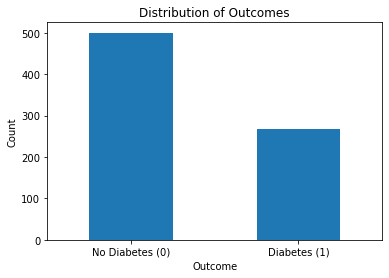

In [7]:
import matplotlib.pyplot as plt


dfc['Outcome'].value_counts().plot(kind='bar')
plt.title('Distribution of Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Diabetes (0)', 'Diabetes (1)'], rotation=0)  # This will label the ticks with text
plt.show()

<font size="4">Checking correlation of features with respect to Outcome</font>

In [8]:
correlation_matrix = pd.DataFrame(dfc.corr()['Outcome']).sort_values(by='Outcome', ascending=False).reset_index().rename(columns={'index': 'Features', 'Outcome': 'Correlation_Score'})
correlation_matrix


,Features,Correlation_Score
0,Outcome,1.000000
1,Glucose,0.466581
2,BMI,0.292695
3,Age,0.238356
4,Pregnancies,0.221898
5,DiabetesPedigreeFunction,0.173844
6,Insulin,0.130548
7,SkinThickness,0.074752
8,BloodPressure,0.065068


<font size="4">As it can be seen from Correlation_Score that there are no signs of multicollinearity or high correlation among features as seen in the given below heatmap</font>

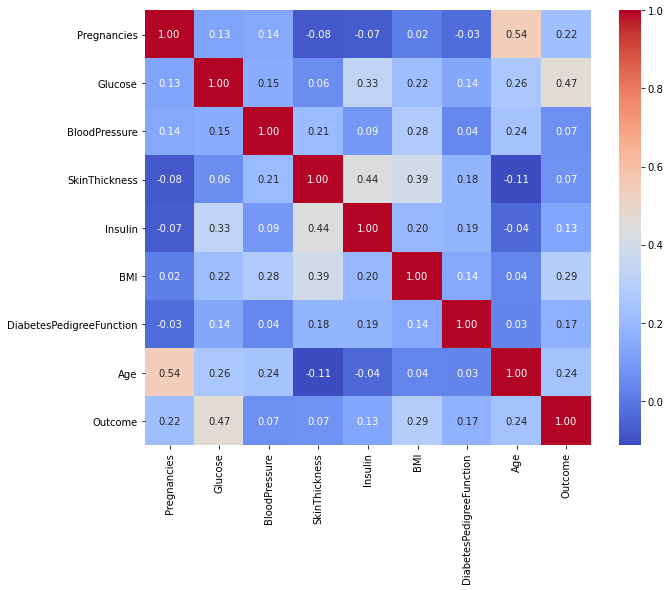

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = dfc.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr.columns, yticklabels=corr.columns)

plt.ylim(len(corr), 0)
plt.show()


<font size="4">Plotting parirplots review 4 out of 8 features at a time </font>

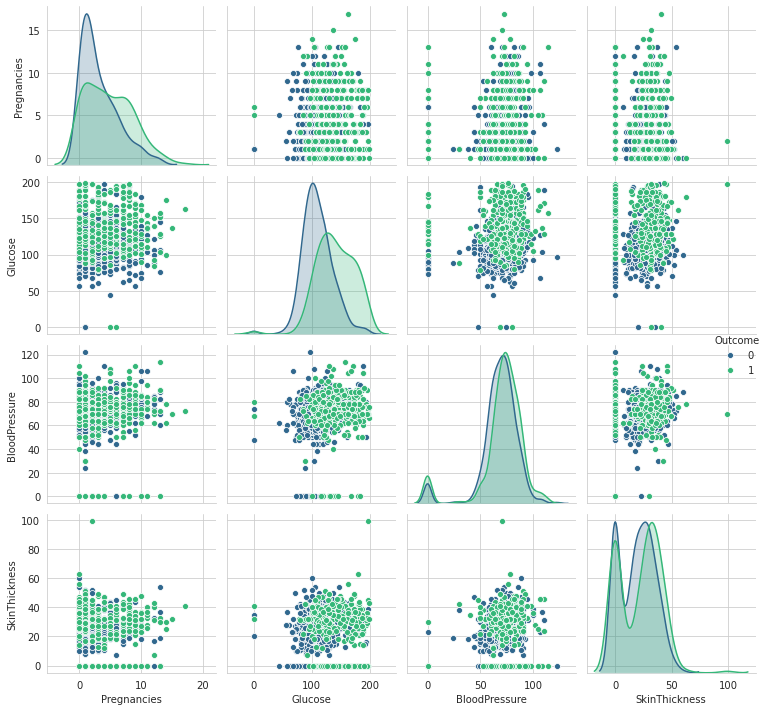

In [10]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
pair_plot = sns.pairplot(dfc, vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness'], hue='Outcome', palette='viridis')
plt.tight_layout()
plt.show()

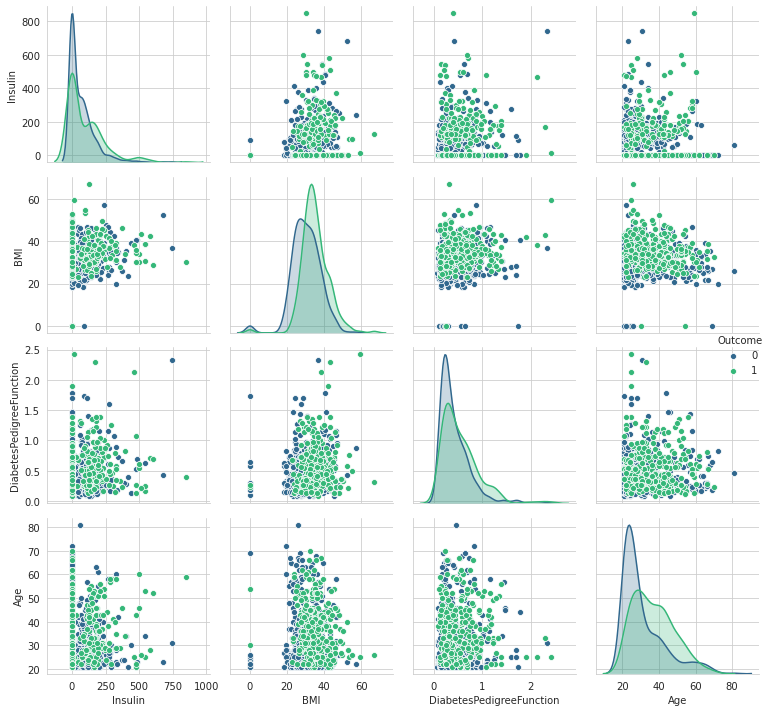

In [11]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
pair_plot = sns.pairplot(dfc, vars=[ 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], hue='Outcome', palette='viridis')
plt.tight_layout()
plt.show()


<font size="4">Creating a function : model_all_features which evaluates the performance of various classification models on a dataset using cross-validation. The data is split into training and test sets according to the indices provided by KFold (K=5) train</font>

In [12]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


X = dfc.copy()
Y = X.pop('Outcome')

def model_all_features(modelname):
    kf = KFold(n_splits=5)
    model = None

    if modelname == 'Logistic':
        print("Logistic Regression Model")
        model = LogisticRegression(max_iter=10000)
    elif modelname == 'RF':
        print("Random Forest Model")
        model = RandomForestClassifier()
    elif modelname == 'ExtraTrees':
        print("Extra Trees Model")
        model = ExtraTreeClassifier()
    elif modelname == 'AdaBoost':
        print("Adaboost Model")
        model = AdaBoostClassifier()
    elif modelname == 'SVM':
        print("SVM Model")
        model = SVC(kernel='rbf')
    elif modelname == 'Scaled SVM':
        print("Scaled SVM Model")
        model = SVC(kernel='rbf')

    accuracies, precision, recall, f1score = [], [], [], []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        if modelname == 'Scaled SVM':
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

     
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        accuracies.append(accuracy_score(y_test, predictions))
        precision.append(precision_score(y_test, predictions, average='macro'))
        recall.append(recall_score(y_test, predictions, average='macro'))
        f1score.append(f1_score(y_test, predictions, average='macro'))

    average_accuracy = np.mean(accuracies)
    print("Average Accuracy of " + modelname + " Model:", average_accuracy)
    average_precision = np.mean(precision)
    print("Average Precision of " + modelname + " Model:", average_precision)
    average_recall = np.mean(recall)
    print("Average Recall of " + modelname + " Model:", average_recall)
    average_f1score = np.mean(f1score)
    print("Average F1 Score of " + modelname + " Model:", average_f1score)


<font size="4">Testing the data on multiple models as defined in the above function</font>

In [13]:
model_all_features('Logistic')

Logistic Regression Model
Average Accuracy of Logistic Model: 0.770902300314065
Average Precision of Logistic Model: 0.7529770111256211
Average Recall of Logistic Model: 0.7262210280876857
Average F1 Score of Logistic Model: 0.7334297434860477


In [14]:
model_all_features("RF")

Random Forest Model
Average Accuracy of RF Model: 0.7696205755029285
Average Precision of RF Model: 0.7515194094170563
Average Recall of RF Model: 0.7277347088576402
Average F1 Score of RF Model: 0.7342881253245306


In [15]:
model_all_features('ExtraTrees')

Extra Trees Model
Average Accuracy of ExtraTrees Model: 0.6562176385705797
Average Precision of ExtraTrees Model: 0.6190818122120644
Average Recall of ExtraTrees Model: 0.6193269092608823
Average F1 Score of ExtraTrees Model: 0.6177877730318515


In [16]:
model_all_features('AdaBoost')

Adaboost Model
Average Accuracy of AdaBoost Model: 0.7448688566335625
Average Precision of AdaBoost Model: 0.7192147843623271
Average Recall of AdaBoost Model: 0.705998959765441
Average F1 Score of AdaBoost Model: 0.7093141418717331


In [17]:
model_all_features('SVM')

SVM Model
Average Accuracy of SVM Model: 0.753968253968254
Average Precision of SVM Model: 0.7482709580661419
Average Recall of SVM Model: 0.6886361851960061
Average F1 Score of SVM Model: 0.6977223741546628


In [18]:
model_all_features('Scaled SVM')

Scaled SVM Model
Average Accuracy of Scaled SVM Model: 0.7683048977166624
Average Precision of Scaled SVM Model: 0.7542148406700588
Average Recall of Scaled SVM Model: 0.7211036649502806
Average F1 Score of Scaled SVM Model: 0.7279388754270352


<font size="4">As it can be seen that best scores (Accuracy and Precision) are from Logistic Regression model, we will go ahead with it</font>

<font size="4">In the below code, we are using Logistic Regression mdoel and we're interpreting the coefficients from the logistic regression as "importances". The sign of the coefficient indicates the direction of the relationship with the target variable, and the magnitude gives a sense of its strength, assuming all features are on the same scale. We sort the features by the absolute values of these coefficients to prioritize features by the strength of their relationship. </font>

Precision of Logistic Regression Model:  0.6379310344827587
Recall of Logistic Regression Model:  0.6727272727272727
F1 Score of Logistic Regression Model:  0.6548672566371682
Accuracy of Logistic Regression Model:  0.7467532467532467
[[78 21]
 [18 37]]


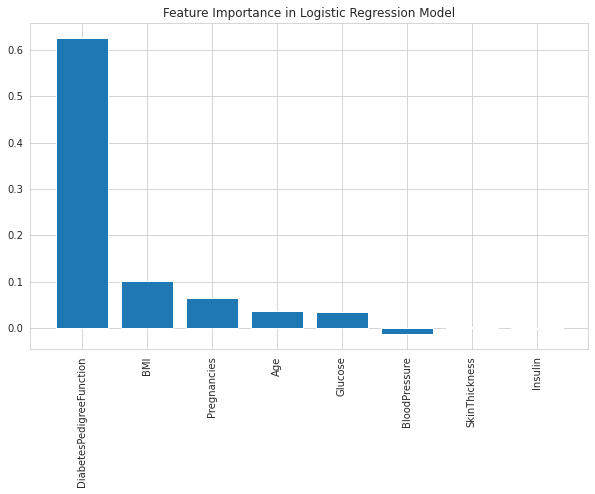

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X = dfc.copy()
Y = X.pop('Outcome')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Precision of Logistic Regression Model: ", precision_score(y_test, predictions))
print("Recall of Logistic Regression Model: ", recall_score(y_test, predictions))
print("F1 Score of Logistic Regression Model: ", f1_score(y_test, predictions))
print("Accuracy of Logistic Regression Model: ", accuracy_score(y_test, predictions))

print(confusion_matrix(y_test, predictions))

coefficients = model.coef_[0]

df_feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': coefficients})

df_feature_importances = df_feature_importances.reindex(df_feature_importances.Importance.abs().sort_values(ascending=False).index)

plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Logistic Regression Model")
plt.bar(df_feature_importances['Feature'], df_feature_importances['Importance'])
plt.xticks(rotation=90)
plt.show()



<font size="4">As it can be seen DiabetetsPedigreeFunction is one of the most important amd thus, we can say that genetics play a huge role, followed by BMI, which can also be intepreted as how healthy you are. However, we will take this interpretation with a pinch of salt as the the features are not standardised.</font>

<font size="6">Running the same model after standardising the features to have more clearer picture</font>

Precision of Logistic Regression Model:  0.6491228070175439
Recall of Logistic Regression Model:  0.6727272727272727
F1 Score of Logistic Regression Model:  0.6607142857142858
Accuracy of Logistic Regression Model:  0.7532467532467533
[[79 20]
 [18 37]]


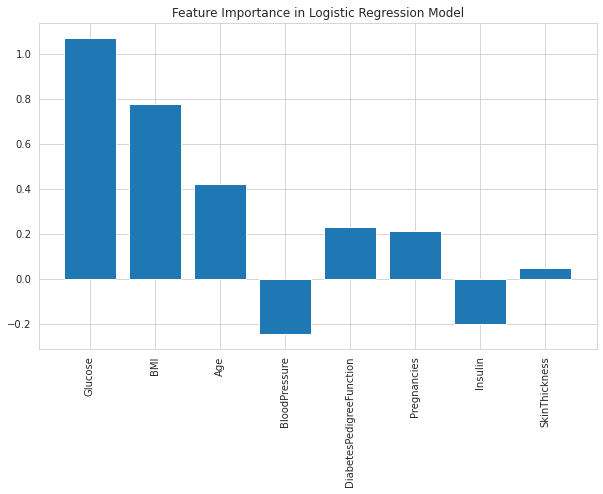

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X = dfc.copy()
Y = X.pop('Outcome')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

print("Precision of Logistic Regression Model: ", precision_score(y_test, predictions))
print("Recall of Logistic Regression Model: ", recall_score(y_test, predictions))
print("F1 Score of Logistic Regression Model: ", f1_score(y_test, predictions))
print("Accuracy of Logistic Regression Model: ", accuracy_score(y_test, predictions))

print(confusion_matrix(y_test, predictions))

coefficients = model.coef_[0]

df_feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': coefficients})

df_feature_importances = df_feature_importances.reindex(df_feature_importances.Importance.abs().sort_values(ascending=False).index)

plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Logistic Regression Model")
plt.bar(df_feature_importances['Feature'], df_feature_importances['Importance'])
plt.xticks(rotation=90)
plt.show()


<font size="4">Glucose: Has the largest positive coefficient, suggesting a strong positive association with the likelihood of diabetes. As glucose levels increase, so does the log-odds of having diabetes, which aligns with medical understanding.</font>

<font size="4">BMI: The next highest positive coefficient, indicating that higher BMI values increase the likelihood of diabetes, consistent with the known link between obesity and type 2 diabetes.</font>

<font size="4">Age: Also has a positive coefficient, but smaller than Glucose and BMI, implying that the probability of diabetes increases with age, though the effect is not as strong as Glucose or BMI.</font>

<font size="4">BloodPressure: Has a smaller positive coefficient, suggesting a slight positive relationship with the likelihood of diabetes, but the effect is relatively minor compared to Glucose and BMI.</font>

<font size="4">DiabetesPedigreeFunction: Displays a modest positive coefficient, which implies that higher values (indicating a genetic predisposition) are associated with an increased likelihood of diabetes.</font>

<font size="4">Pregnancies: Has a small positive coefficient, indicating a slight increase in the likelihood of diabetes with the number of pregnancies, which could be related to gestational diabetes history.</font>

<font size="4">Insulin: Interestingly, this coefficient is near zero and is slightly negative. The near-zero value suggests that in the context of the other features, insulin levels don't have a strong independent association with the likelihood of diabetes in this model.</font>

<font size="4">SkinThickness: Shows a small negative coefficient, which is a bit counterintuitive as one might expect skin thickness to be positively associated with diabetes. The negative coefficient indicates that, all else being equal, higher skin thickness is slightly associated with lower odds of diabetes in the model. </font>

<font size="6">Finding the best combination of features to predict Outcome</font>

In [24]:
import itertools
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def test_feature_combinations(data, target_name):
    
    original_features = data.drop(columns=[target_name]).columns
    best_score = 0
    best_combination = []
    performance_records = []

    X_all = data[original_features]
    Y = data[target_name]
    X_train_all, X_test_all, y_train, y_test = train_test_split(X_all, Y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_all_scaled = scaler.fit_transform(X_train_all)
    X_test_all_scaled = scaler.transform(X_test_all)

    for i in range(len(original_features)):
        for combination in itertools.combinations(original_features, i + 1):
            indices = [original_features.get_loc(feature) for feature in combination]
            X_train_scaled = X_train_all_scaled[:, indices]
            X_test_scaled = X_test_all_scaled[:, indices]

            model = LogisticRegression(max_iter=10000)
            model.fit(X_train_scaled, y_train)
            predictions = model.predict(X_test_scaled)
            score = accuracy_score(y_test, predictions)

            performance_records.append({
                'Features': ', '.join(combination),
                'Accuracy': score,
                'Precision': precision_score(y_test, predictions, zero_division=0),
                'Recall': recall_score(y_test, predictions, zero_division=0),
                'F1 Score': f1_score(y_test, predictions, zero_division=0)
            })

            if score > best_score:
                best_score = score
                best_combination = combination

    performance_df = pd.DataFrame(performance_records)
    sorted_performance_df = performance_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
    
    return sorted_performance_df, best_combination

performance_df, best_features = test_feature_combinations(df, 'Outcome')
print("Best feature combination:", best_features)
print(performance_df.head())


Best feature combination: ('Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction')
                                            Features  Accuracy  Precision  \
0  Pregnancies, Glucose, SkinThickness, Insulin, ...  0.741877   0.723684   
1  Glucose, BloodPressure, SkinThickness, Insulin...  0.740072   0.705521   
2  Pregnancies, Glucose, BloodPressure, SkinThick...  0.740072   0.721854   
3  Pregnancies, Glucose, BloodPressure, SkinThick...  0.738267   0.706250   
4  Glucose, BloodPressure, SkinThickness, Insulin...  0.738267   0.703704   

     Recall  F1 Score  
0  0.521327  0.606061  
1  0.545024  0.614973  
2  0.516588  0.602210  
3  0.535545  0.609164  
4  0.540284  0.611260  


<font size="4">As it can be seen from the model that  it looks like the best feature combination includes 'Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', and 'DiabetesPedigreeFunction'. This combination achieved the highest accuracy among the tested combinations.</font>